In [ ]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory containing the images
data_dir = '/path/to/directory'

# Define the number of images in the dataset
num_images = len(os.listdir(data_dir))

# Define the percentage split for training, validation, and testing sets
train_pct = 0.72
val_pct = 0.08
test_pct = 0.2

# Define the batch size for the data generator
batch_size = 32

# Define the image size and channels
img_height = 224
img_width = 224
img_channels = 3

# Define the number of classes
num_classes = 2

# Define the data augmentation for the training data
train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=0.1,
                                     height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,
                                     horizontal_flip=True, fill_mode='nearest')

# Define the data augmentation for the validation and test data
val_test_data_gen = ImageDataGenerator(rescale=1./255)

# Define the training data generator
train_generator = train_data_gen.flow_from_directory(
    directory=data_dir,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
    subset='training'
)

# Define the validation data generator
validation_generator = val_test_data_gen.flow_from_directory(
    directory=data_dir,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
    subset='validation'
)

# Define the test data generator
test_generator = val_test_data_gen.flow_from_directory(
    directory=data_dir,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
    subset='test'
)

# Define the TensorFlow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, img_channels)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

# Compile the TensorFlow model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the TensorFlow model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the TensorFlow model on the test set
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import img_to_array, load_img, array_to_img

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

2023-03-06 00:47:56.033671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 00:47:56.696621: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64
2023-03-06 00:47:56.696684: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64
2023-03-06 00:47:56.696692: W tensorflow/compiler/tf2tensorrt/utils/py_utils

In [2]:
img = load_img('data/test/knives/P00002.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in test_datagen.flow(x, 
                          batch_size=1, 
                          save_to_dir='data/preview/test/knives/', 
                          save_prefix='knife', 
                          save_format='jpg'):
    i += 1
    if i > 30:
        break


In [3]:
train_generator = train_datagen.flow_from_directory(
    "data/train/",
    target_size=(300, 300),
    batch_size=128,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    "data/test/",
    target_size=(300, 300),
    batch_size=128,
    class_mode="binary"
)


Found 3111 images belonging to 2 classes.
Found 777 images belonging to 2 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


2023-03-05 12:17:25.761121: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 12:17:25.793011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 12:17:25.793224: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 12:17:25.793997: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operation

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [6]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])


/home/eli/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    # validation_split=0.2,
    validation_data=validation_generator,    
    validation_steps=8,
    verbose=1)

model.save_weights('weights.h5')


Epoch 1/15


2023-03-05 12:17:29.031475: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 138240000 exceeds 10% of free system memory.
2023-03-05 12:17:32.093479: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 138240000 exceeds 10% of free system memory.
2023-03-05 12:17:32.926322: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-05 12:17:34.692506: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 138240000 exceeds 10% of free system memory.
2023-03-05 12:17:37.206389: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.37GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-05 12:17:37.305798: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.37GiB with freed_by_c

3/8 [==========>...................] - ETA: 6s - loss: 0.8189 - accuracy: 0.4948

2023-03-05 12:17:40.695715: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 138240000 exceeds 10% of free system memory.


4/8 [==============>...............] - ETA: 6s - loss: 0.7862 - accuracy: 0.4941

2023-03-05 12:17:43.089596: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 138240000 exceeds 10% of free system memory.


8/8 [==============================] - 30s 3s/step - loss: 0.7353 - accuracy: 0.5098 - val_loss: 0.6919 - val_accuracy: 0.4981
Epoch 2/15
8/8 [==============================] - 19s 2s/step - loss: 0.7415 - accuracy: 0.6543
Epoch 3/15
8/8 [==============================] - 19s 2s/step - loss: 0.6190 - accuracy: 0.6631
Epoch 4/15
8/8 [==============================] - 19s 2s/step - loss: 0.5207 - accuracy: 0.7539
Epoch 5/15
8/8 [==============================] - 19s 2s/step - loss: 0.5186 - accuracy: 0.7461
Epoch 6/15
8/8 [==============================] - 17s 2s/step - loss: 0.5126 - accuracy: 0.7647
Epoch 7/15
8/8 [==============================] - 17s 2s/step - loss: 0.5171 - accuracy: 0.7465
Epoch 8/15
8/8 [==============================] - 19s 2s/step - loss: 0.4246 - accuracy: 0.7969
Epoch 9/15
8/8 [==============================] - 19s 2s/step - loss: 0.4866 - accuracy: 0.7988
Epoch 10/15
8/8 [==============================] - 17s 2s/step - loss: 0.3650 - accuracy: 0.8567
Epoch 11

In [28]:
model.load_weights('weights.h5')

1/1 [==============================] - 0s 16ms/step


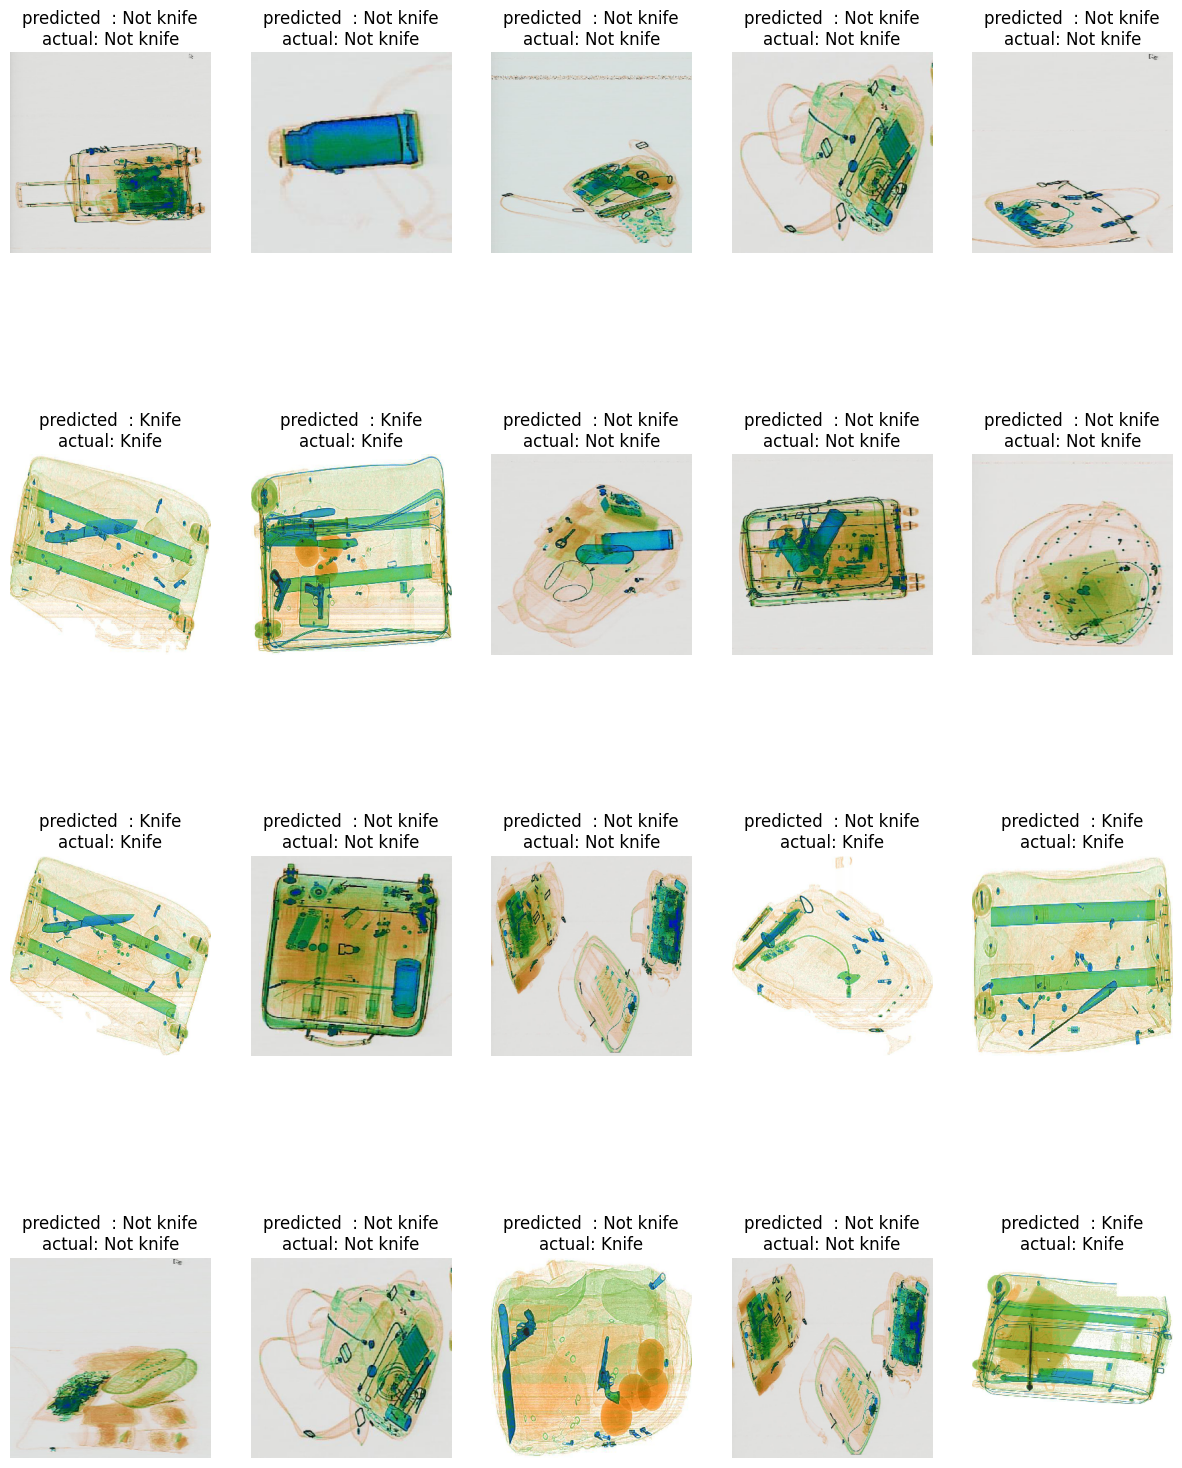

In [35]:
import random
from matplotlib import pyplot as plt

images, labels = next(validation_generator)
class_names = ['Knife', 'Not knife']

plt.figure(figsize=(15,20))
for n in range(20):
    x = random.randrange(128)  
    ax = plt.subplot(4,5,n+1)
    plt.imshow(images[x])
    predicted = model.predict(images[x: x+1])[0][0]
    type = 0
    if predicted >= 0.5:
        type = 1
    plt.title(f"predicted  : {class_names[type]}\nactual: {class_names[int(labels[x])]}")
    plt.axis('off')


In [10]:
from keras import metrics

In [26]:
import numpy as np
from keras.preprocessing import image

test = load_img('data/test/knives/P00004.jpg', target_size=(300, 300))
test = np.expand_dims(test, axis=0)
prediction = model.predict(test)


1/1 [==============================] - 0s 16ms/step


In [27]:
prediction

array([[0.]], dtype=float32)

In [13]:
train_generator.class_indices

{'knives': 0, 'notknife': 1}